# Building A Handwritten Digits Classifier

In this project I'll build models that can classify handwritten digits, with a focus on deep neural network. 

Before the year 2000, institutions like the United States Post Office used handwriting recognition software to read addresses, zip codes, and more. One of their approaches, which consists of pre-processing handwritten images then feeding to a neural network model is detailed in [this paper](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.852.5499&rep=rep1&type=pdf).

In this project, I'll:

- Observe the limitations of traditional machine learning models for image classification;
- Train, test, and improve a few different deep neural networks for image classification.

Deep neural networks have been used to reach state-of-the-art performance on **image classification** tasks in the last decade. For some image classification tasks, deep neural networks actually perform as well as or slightly better than the human benchmark. You can read about the history of deep neural networks [here](https://arxiv.org/pdf/1803.01164.pdf).

To end this course, we'll build models that can classify handwritten digits. Before the year 2000, institutions like the United States Post Office used handwriting recognition software to read addresses, zip codes, and more. One of their approaches, which consists of pre-processing handwritten images then feeding to a neural network model is detailed in this paper.

# Exploring the Data

Scikit-learn contains a number of [datasets](https://scikit-learn.org/stable/datasets/index.html) pre-loaded with the library, within the namespace of `sklearn.datasets`. The `load_digits()` function returns a copy of the [hand-written digits dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) from UCI.

Here's a preview of the data set:

In [51]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Options to set
%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 99)
np.random.seed(1)
model_seed = 1

# Load the data
digits_data = load_digits()

digits_data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [52]:
# Target values
labels = pd.Series(digits_data['target'])

labels.head(15)

0     0
1     1
2     2
3     3
4     4
5     5
6     6
7     7
8     8
9     9
10    0
11    1
12    2
13    3
14    4
dtype: int64

In [53]:
# Images data
data = pd.DataFrame(digits_data['data'])

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


## Visualyze Digits

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize the image, I need to reshape these pixel values back into the 8 by 8 and plot them on a coordinate grid.

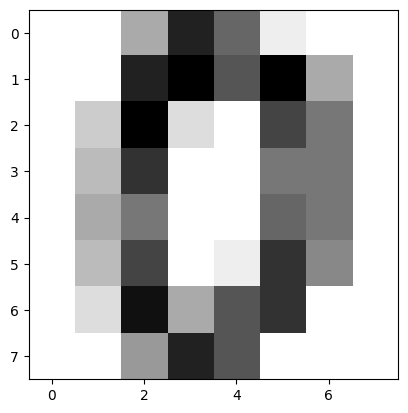

In [54]:
# Reshape the first image
np_image = data.iloc[0].values.reshape(8,8)

# PLot the image with "default" style
with plt.style.context('default'):
  plt.imshow(np_image, cmap='gray_r')
plt.show()

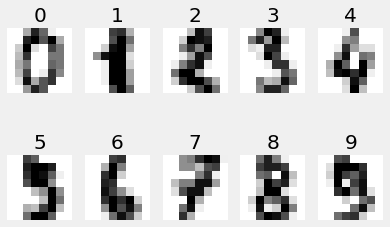

In [55]:
fig, ax = plt.subplots(2, 5)

for i in range(2):
  for j in range(5):
    index = i*5 + j
    ax[i,j].imshow(data.iloc[index].values.reshape(8,8), cmap='gray_r')
    ax[i,j].set_title(labels.iloc[index])
    ax[i,j].axis('off')
    
plt.show()

# Classification

## K-Nearest Neighbors

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. This allows them to capture nonlinearity in the data. K-nearest neighbors don't have a specific model representation, hence why it's referred to as an algorithm and not a model.

The k-nearest neighbors algorithm compares every unseen observation in the test set to all training observations to look for similar observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

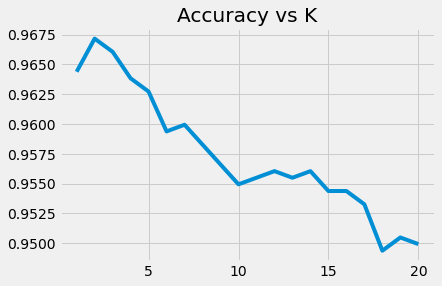

In [56]:
np.random.seed(1)
# Set the hyperparameter
parameters = {"n_neighbors": range(1,21)}

# Set the classifier
knn = KNeighborsClassifier()
# Set the grid search
gs = GridSearchCV(knn, parameters, scoring="accuracy")
gs.fit(data, labels)
# Take results
knn_results = gs.cv_results_["mean_test_score"]

plt.plot(range(1,21), knn_results)
plt.title("Accuracy vs K")
plt.show()

There are a few downsides to using k-nearest neighbors:

- high memory usage (for each new unseen observation, many comparisons need to be made to seen observations);
- no model representation to debug and explore.

## Neural Network

Let's now try a neural network with the [`MLPClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) package from scikit-learn.

### One Hidden Layer



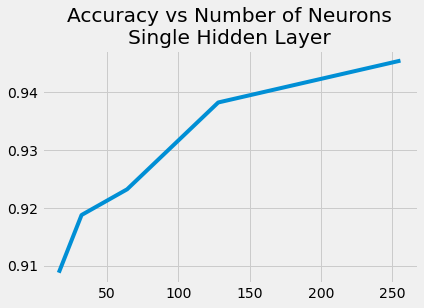

In [57]:
np.random.seed(1)
sizes = [2**i for i in range(4,9)]

# Set the hyperparameter
parameters = {"hidden_layer_sizes": [(i,) for i in sizes]}

# Set the classifier
mlp1 = MLPClassifier(max_iter=1000)
# Set the grid search
gs = GridSearchCV(mlp1, parameters, scoring="accuracy")
gs.fit(data, labels)
# Take results
mlp1_results = gs.cv_results_["mean_test_score"]

plt.plot(sizes, mlp1_results)
plt.title("Accuracy vs Number of Neurons\nSingle Hidden Layer")
plt.show()

It looks like adding more neurons to the single hidden layer helped massively improved accuracy from approximately `90%` to approximately `94%`. Simple accuracy computes the number of correct classifications the model made, but doesn't tell anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately `96%` accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

### Two Hidden Layers



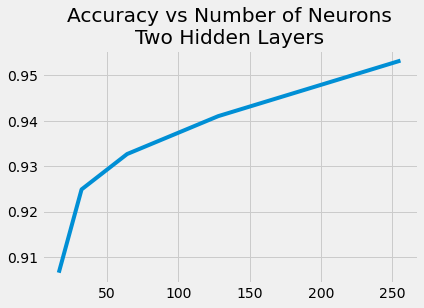

In [58]:
np.random.seed(1)

# Set the hyperparameter
parameters = {"hidden_layer_sizes": [(i,i) for i in sizes]}

# Set the classifier
mlp2 = MLPClassifier(max_iter=1000)
# Set the grid search
gs = GridSearchCV(mlp2, parameters, scoring="accuracy")
gs.fit(data, labels)
# Take results
mlp2_results = gs.cv_results_["mean_test_score"]

plt.plot(sizes, mlp2_results)
plt.title("Accuracy vs Number of Neurons\nTwo Hidden Layers")
plt.show()

Using 2 hidden layers improved the accuracy to `95%`. While I'd traditionally be worried about overfitting, using 5-fold cross validation also gives me a bit more assurance that the model is generalizing to achieve the extra `1%` in simple accuracy over the single hidden layer networks tried earlier.

### Three Hidden Layers



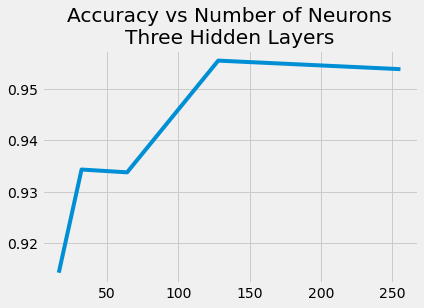

In [59]:
np.random.seed(1)

# Set the hyperparameter
parameters = {"hidden_layer_sizes": [(i,i,i) for i in sizes]}

# Set the classifier
mlp3 = MLPClassifier(max_iter=1000)
# Set the grid search
gs = GridSearchCV(mlp3, parameters, scoring="accuracy")
gs.fit(data, labels)
# Take results
mlp3_results = gs.cv_results_["mean_test_score"]

plt.plot(sizes, mlp3_results)
plt.title("Accuracy vs Number of Neurons\nThree Hidden Layers")
plt.show()

Using 3 hidden layers improved the accuracy to 96%, even with 5-fold cross validation. This seems to be in line with the research literature out there about deep neural networks for computer vision. Having more layers and more neurons tends to improve the network's performance.

### Comparison

Let's see all the results of neural networks on a single figure.

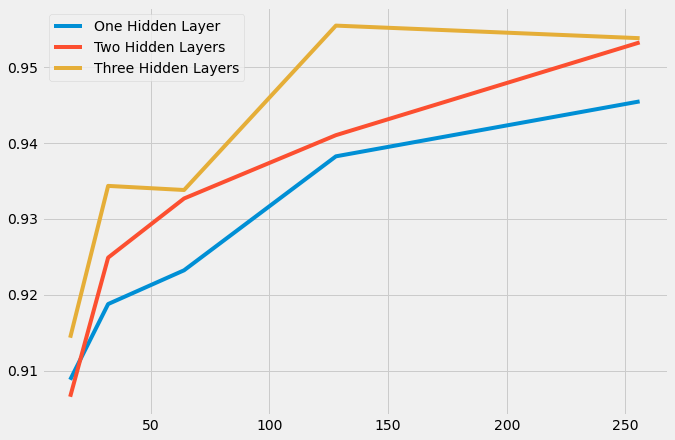

In [61]:
# Create a dataframe with all the results
nn_results = pd.DataFrame({"One Hidden Layer": mlp1_results,
                           "Two Hidden Layers": mlp2_results,
                           "Three Hidden Layers": mlp3_results},
                          index=sizes)

# Plot the results
nn_results.plot(figsize=(10,7))
plt.show()

# Conclusion

In this project, I have explored the effectiveness of deep, feedforward neural networks at classifying images.